**Data Analysis steps:**
1. Overview data & Forming questions
2. Collect data 
  - Data available from kaggle: [Product Analytics Dataset](https://www.kaggle.com/datasets/podsyp/how-to-do-product-analytics?resource=download) 
3. Clean data 
  - Consolidate data (If needed)
  - Cleaning data (If needed) 
    - Treat missing & duplicate data 
    - Fix data inconsistence (data type & values) 
    - Reduce noise 
  - Feature Engineering (If needed)
4. EDA & Visualization 
  - Univariate Analysis
  - Bivariate Analysis
  - Visualizing  
5. Conclusion 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

# **1. Overview data & Forming questions**

**Context:**

Online store of sporting goods: clothing, shoes, accessories and sports nutrition.

**On the main page of the store they show users banners in order to stimulate their sales.** Now one of 5 banners is randomly displayed there. Each banner advertises a specific product or the entire company. Our marketers believe that the experience with banners can vary by segment, and their effectiveness may depend on the characteristics of user behavior.

**Business goals:**
- Perform data analysis.
- Identify factors affecting purchases: Find insights about how customers interact with advertise banner. 
- Recommend solutions to increase purchases via banner.

In [3]:
# Import & Overview data
product = pd.read_csv("/content/drive/MyDrive/CV/Data analysis projects/data/product.csv")
product.head()

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


In [4]:
# Check info & data shape 
print("Shape: {}".format(product.shape))
product.info()

Shape: (8471220, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      object
 1   user_id       object
 2   page_id       object
 3   product       object
 4   site_version  object
 5   time          object
 6   title         object
 7   target        int64 
dtypes: int64(1), object(7)
memory usage: 517.0+ MB


**Schema:**
- order_id: unique purchase number
- user_id: unique customer identifier 
- page_id: unique page number for evnet bundle 
- product: product banner/purchase
- site_version: version_of the site (mobile or desktop) 
- time: action time 
- title: type of event (show, click or purchase) 
- target: purchase target event 

**Data type & number of rows:**
- 8 columns: 6 object type, 1 datetime type ("time" column dtype is wrong) and 1 integer type (target). 
- 8,471,220 rows.


In [5]:
# Check unique values in each columns 
for col in product.columns: 
  unique_vals = product[col].unique() # Find unique values in a column
  len_unique_vals = len(unique_vals) # Count unique values

  # Print result
  print(col)
  print("Number of unique values = {}: {}".format(len_unique_vals, unique_vals[:10])) # Show 10 unique values in a column
  print("".center(30, "="))
  print('\n')

order_id
Number of unique values = 8471220: ['cfcd208495d565ef66e7dff9f98764da' 'c4ca4238a0b923820dcc509a6f75849b'
 'c81e728d9d4c2f636f067f89cc14862c' 'eccbc87e4b5ce2fe28308fd9f2a7baf3'
 'a87ff679a2f3e71d9181a67b7542122c' 'e4da3b7fbbce2345d7772b0674a318d5'
 '1679091c5a880faf6fb5e6087eb1b2dc' '8f14e45fceea167a5a36dedd4bea2543'
 'c9f0f895fb98ab9159f51fd0297e236d' '45c48cce2e2d7fbdea1afc51c7c6ad26']


user_id
Number of unique values = 4254619: ['c81e728d9d4c2f636f067f89cc14862c' 'eccbc87e4b5ce2fe28308fd9f2a7baf3'
 'a87ff679a2f3e71d9181a67b7542122c' 'e4da3b7fbbce2345d7772b0674a318d5'
 '1679091c5a880faf6fb5e6087eb1b2dc' '8f14e45fceea167a5a36dedd4bea2543'
 'c9f0f895fb98ab9159f51fd0297e236d' '45c48cce2e2d7fbdea1afc51c7c6ad26'
 'd3d9446802a44259755d38e6d163e820' '6512bd43d9caa6e02c990b0a82652dca']


page_id
Number of unique values = 7393316: ['6f4922f45568161a8cdf4ad2299f6d23' '4e732ced3463d06de0ca9a15b6153677'
 '5c45a86277b8bf17bff6011be5cfb1b9' 'fb339ad311d50a229e497085aad219c7'
 '182be0c5cd

# **2. Clean data**

In [6]:
# Drop unnecessary columns 
columns_to_drop = ['page_id']
product = product.drop(columns=columns_to_drop)
product.head()

,order_id,user_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0


In [7]:
# Check null values
product.isnull().sum()

order_id        0
user_id         0
product         0
site_version    0
time            0
title           0
target          0
dtype: int64

**Comment:** No nulls values 

In [8]:
# Check duplicates 
print("Number of duplicates: {}".format(product.duplicated().sum()))

Number of duplicates: 0


**Comment:** No duplicates 

In [9]:
# Check for correct data type 
print("Time column dtype before: {}".format(product['time'].dtype))
product['time'] = pd.to_datetime(product['time']) # Change "time" column to datetime type
print("Time column dtype after: {}".format(product['time'].dtype))

Time column dtype before: object
Time column dtype after: datetime64[ns]


In [10]:
# Change values of title column for consistent data 
product['title'] = product['title'].str.replace('banner_click', 'click') 
product['title'] = product['title'].str.replace('banner_show', 'show') 
product.head()

,order_id,user_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,click,0


In [11]:
# Feature Engineering: Extract days, months, year, hours, date from time column 
product['day'] = product['time'].dt.weekday
product['month'] = product['time'].dt.month
product['hour'] = product['time'].dt.hour
product['date'] = product['time'].dt.date

product.head() # Recheck 

,order_id,user_id,product,site_version,time,title,target,day,month,hour,date
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,click,0,4,1,9,2019-01-11
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,show,0,2,1,9,2019-01-09
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,show,0,2,1,9,2019-01-09
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,show,0,3,1,8,2019-01-03
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,click,0,3,1,8,2019-01-03


# **3. EDA & Visualization**

In [12]:
# Describe overall data 
product.describe(include='all')

,order_id,user_id,product,site_version,time,title,target,day,month,hour,date
count,8471220,8471220,8471220,8471220,8471220,8471220,8.471220e+06,8.471220e+06,8.471220e+06,8.471220e+06,8471220
unique,8471220,4254619,5,2,5799549,3,NaN,NaN,NaN,NaN,151
top,cfcd208495d565ef66e7dff9f98764da,6e1d9fca53a19d4f105947348fd1d627,clothes,mobile,2019-02-04 10:32:05,show,NaN,NaN,NaN,NaN,2019-05-20
freq,1,23,1786438,6088335,10,7393314,NaN,NaN,NaN,NaN,80025
first,NaN,NaN,NaN,NaN,2019-01-01 00:00:03,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-05-31 23:59:58,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.936082e-02,2.986464e+00,3.239505e+00,1.236124e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.688158e-01,1.989171e+00,1.421114e+00,5.422469e+00,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00,NaN


**Comment:** 
- 4254619 unique user_id -> One user_id can have many titles (banner_click, banner_show, banner_purchase) & interact with many banners overtime.
- 5 unique product, 2 site version, 3 title. 
- Target ratio = 0.029 = 2.9% -> Purchase rate is low -> Imbalance target data
- Time range: 2019-01-01 to 2019-05-31 (yyyy-mm-dd) 


### **Univariate Analysis**

In [13]:
# Define a function for calculating category's proportion 
def get_proportion(dataframe, feature):
  """
  This function return count & ratio tables of each unique values in a features. 
  """
  count_unique_values = dataframe[feature].value_counts(sort=True, ascending=False)
  ratio_unique_values = round(dataframe[feature].value_counts(sort=True, ascending=False)*100/dataframe.shape[0], 2)
  return count_unique_values, ratio_unique_values

# Define a function for plotting a bar chart 
def plot_bar(x, y, title, x_label, y_label, color_palette=None, horizontal=False):
  """
  This function plot a vertical (horizontal) bar chart  
  """
  fig, axes = plt.subplots(1, 1, figsize=(14, 5))
  if horizontal:
    axes.barh(y, x, color=color_palette)
    for p in axes.patches:
      axes.annotate(p.get_width(), (p.get_width() + 0.075, p.get_y() + p.get_height()/2.5), horizontalalignment='left')
    axes.set_ylabel(y_label)
    axes.set_xlabel(x_label)
    axes.set_title(title)
  else: 
    axes.bar(y, x, color=color_palette)
    for p in axes.patches:
      print(p)
      axes.annotate(p.get_height(), (p.get_x() + p.get_width()/2.5, p.get_height() + 0.075))
    axes.set_ylabel(y_label)
    axes.set_xlabel(x_label)
    axes.set_title(title)
  plt.show()

product
Count by product:
clothes             1786438
company             1725056
sneakers            1703342
sports_nutrition    1634625
accessories         1621759
Name: product, dtype: int64
Ratio by product:
clothes             21.09
company             20.36
sneakers            20.11
sports_nutrition    19.30
accessories         19.14
Name: product, dtype: float64


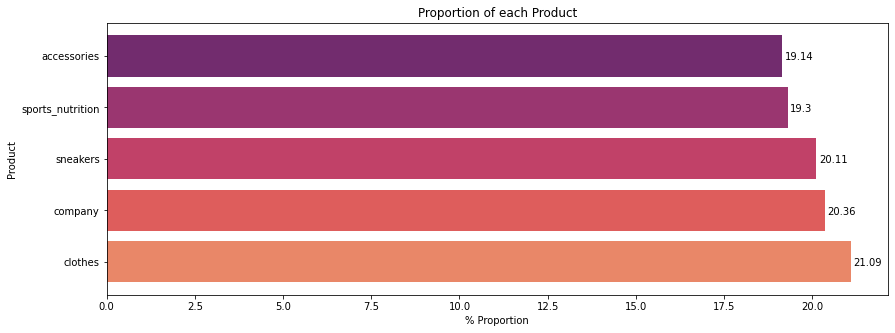



site_version
Count by site_version:
mobile     6088335
desktop    2382885
Name: site_version, dtype: int64
Ratio by site_version:
mobile     71.87
desktop    28.13
Name: site_version, dtype: float64


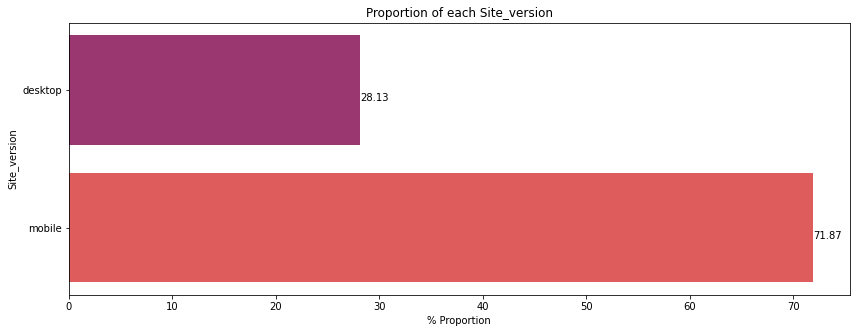



title
Count by title:
show     7393314
click     829184
order     248722
Name: title, dtype: int64
Ratio by title:
show     87.28
click     9.79
order     2.94
Name: title, dtype: float64


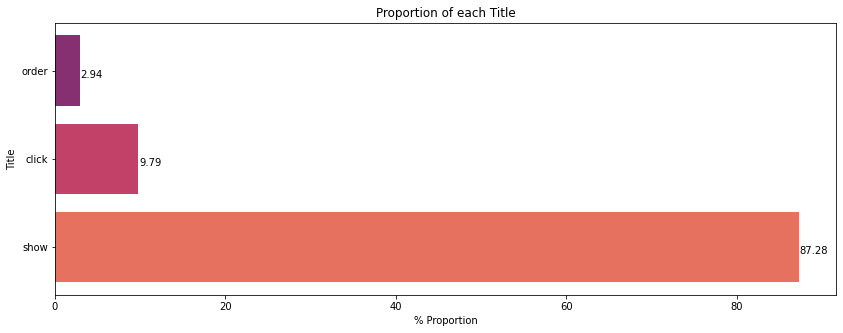



target
Count by target:
0    8222498
1     248722
Name: target, dtype: int64
Ratio by target:
0    97.06
1     2.94
Name: target, dtype: float64


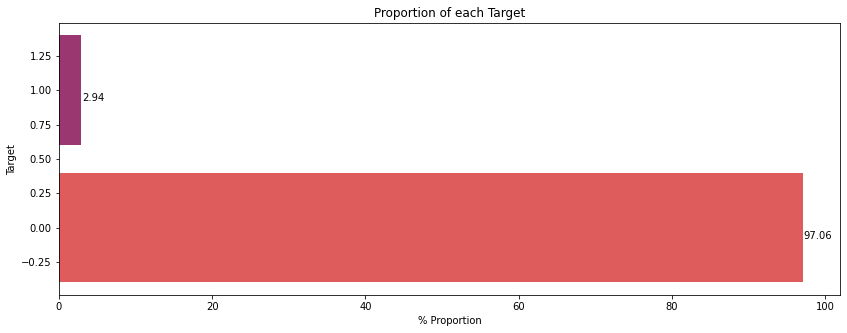

In [14]:
# Prepare analyzing features
univariate_analyze_columns = ['product', 'site_version', 'title', 'target']

for col in univariate_analyze_columns:
  print(col)
  # Print count table & ratio table
  count_unique_values, ratio_unique_values = get_proportion(product, col)
  print("Count by {}:".format(col))
  print(count_unique_values)
  print("".center(30, "="))
  print("Ratio by {}:".format(col))
  print(ratio_unique_values)

  # Plot bar chart
  palette = sns.color_palette("flare", n_colors=len(ratio_unique_values.index)) # Define palette
  plot_bar(
      x = ratio_unique_values.values,
      y = ratio_unique_values.index,
      title='Proportion of each {}'.format(col.capitalize()), 
      x_label='% Proportion',
      y_label=col.capitalize(),
      color_palette = palette, 
      horizontal=True
  )
  print("\n")

**Comment:** 
- Each product accounts for 19% - 20% of total data -> balance 
- More than 71% users prefer using mobile phone than desktop (only 28%)
- Nearly 3% of users actually have an order, click rate is nearly 10%. 


### **Bivariate Analysis**

#### Visualization

**Question:** Which product has the highest conversion rate?

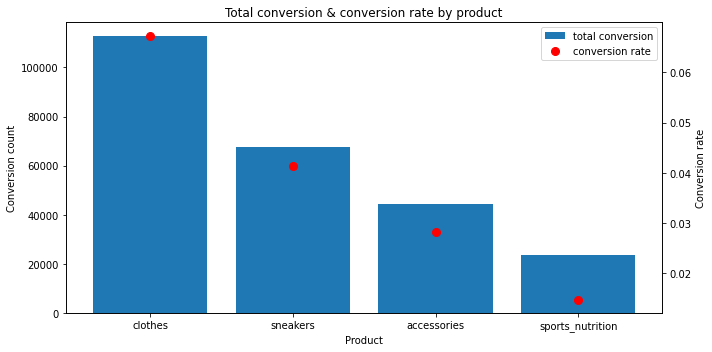

Conversion rate by product:


,order_id
product,
clothes,0.067344
sneakers,0.041403
accessories,0.028247
sports_nutrition,0.014735


In [15]:
# Product has the highest conversion rate 
conversion_count_by_product = product[product['target'] == 1].groupby('product')['order_id'].count().sort_values(ascending=False) # Count total conversion for each product
visit_count_by_product = product[product['target'] == 0].groupby('product')['order_id'].count().drop('company').loc[conversion_count_by_product.index] # Count total visit for each product
conversion_rate_by_product = conversion_count_by_product/visit_count_by_product # Calculate conversion rate

# Visualize total conversion and conversion rate of each product
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(conversion_count_by_product.index, conversion_count_by_product.values, label='total conversion') # Plot total conversion
ax1.set_title('Total conversion & conversion rate by product')
ax1.set_ylabel('Conversion count')
ax1.set_xlabel('Product')

ax2 = ax1.twinx() # Plot conversion rate
ax2.plot(conversion_rate_by_product.index, conversion_rate_by_product.values, color='r', marker='o', markersize=8, linestyle="None", label='conversion rate') 
ax2.set_ylabel('Conversion rate')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

# Print conversion rate 
print("".center(50, "="))
print("Conversion rate by product:")
conversion_rate_by_product.sort_values(ascending=False).to_frame().style.background_gradient(cmap='Blues')

- clothes and sneakers have highest conversion rate. 
- accessories and sport nutrition have low conversion rate. 

**Question:** Which site has the highest conversion rate?

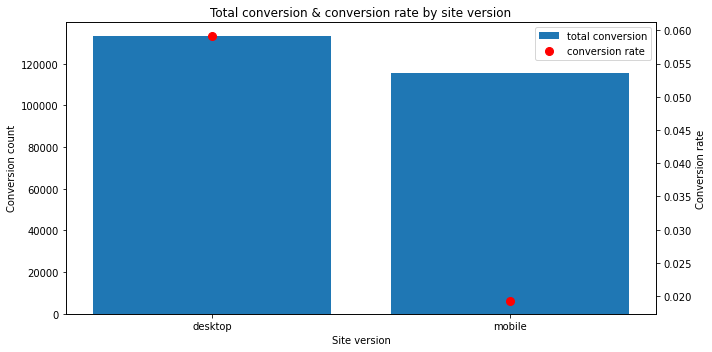

Conversion rate by site version:


,order_id
site_version,
desktop,0.059199
mobile,0.019345


In [16]:
# Site version has the highest conversion rate 
conversion_count_by_site_version = product[product['target'] == 1].groupby('site_version')['order_id'].count().sort_values(ascending=False) # Count total conversion for each site_version
visit_count_by_site_version = product[product['target'] == 0].groupby('site_version')['order_id'].count().loc[conversion_count_by_site_version.index] # Count total visit for each site_version
conversion_rate_by_site_version = conversion_count_by_site_version/visit_count_by_site_version # Calculate conversion rate

# Visualize total conversion and conversion rate of each site version
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(conversion_count_by_site_version.index, conversion_count_by_site_version.values, label='total conversion') # Plot total conversion
ax1.set_title('Total conversion & conversion rate by site version')
ax1.set_ylabel('Conversion count')
ax1.set_xlabel('Site version')

ax2 = ax1.twinx() # Plot conversion rate
ax2.plot(conversion_rate_by_site_version.index, conversion_rate_by_site_version.values, color='r', marker='o', markersize=8, linestyle="None", label='conversion rate') 
ax2.set_ylabel('Conversion rate')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

# Print conversion rate 
print("".center(50, "="))
print("Conversion rate by site version:")
conversion_rate_by_site_version.sort_values(ascending=False).to_frame().style.background_gradient(cmap='Blues')

- Total conversion rate of desktop and mobile are nearly the same. However, conversion rate of desktop is much higher than that of mobile

**Question:** Which month has the highest conversion rate?

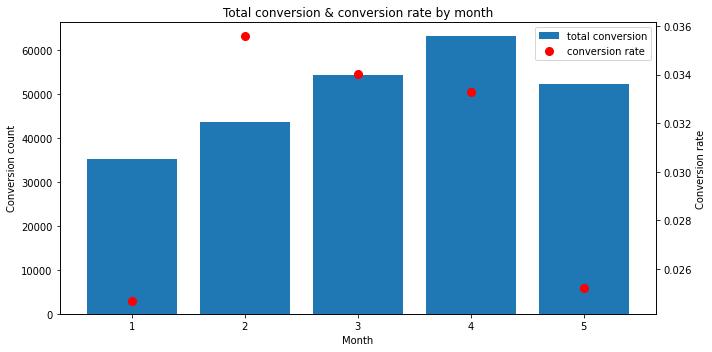

Conversion rate by month:


,order_id
month,
2,0.035599
3,0.034040
4,0.033296
5,0.025202
1,0.024706


In [17]:
# Month has the highest conversion rate 
conversion_count_by_month = product[product['target'] == 1].groupby('month')['order_id'].count().sort_values(ascending=False) # Count total conversion for each month
visit_count_by_month = product[product['target'] == 0].groupby('month')['order_id'].count().loc[conversion_count_by_month.index] # Count total visit for each month
conversion_rate_by_month = conversion_count_by_month/visit_count_by_month # Calculate conversion rate

# Visualize total conversion and conversion rate of each month
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(conversion_count_by_month.index, conversion_count_by_month.values, label='total conversion') # Plot total conversion
ax1.set_title('Total conversion & conversion rate by month')
ax1.set_ylabel('Conversion count')
ax1.set_xlabel('Month')

ax2 = ax1.twinx() # Plot conversion rate
ax2.plot(conversion_rate_by_month.index, conversion_rate_by_month.values, color='r', marker='o', markersize=8, linestyle="None", label='conversion rate') 
ax2.set_ylabel('Conversion rate')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

# Print conversion rate 
print("".center(50, "="))
print("Conversion rate by month:")
conversion_rate_by_month.sort_values(ascending=False).to_frame().style.background_gradient(cmap='Blues')

- Febuary has  the highest conversion rate, January and May are the lowest. 
- April has the highest total conversion, slightly lower rate compare to Febuary.

**Question:** Which day has the highest conversion rate?

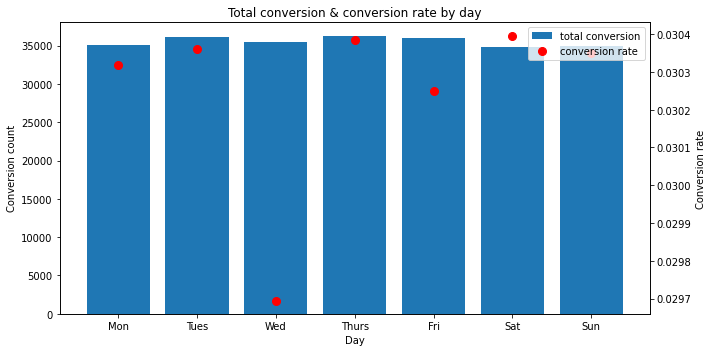

Conversion rate by day:


,order_id
day,
Sat,0.030396
Thurs,0.030385
Tues,0.030361
Sun,0.030350
Mon,0.030317
Fri,0.030249
Wed,0.029695


In [18]:
day_dict = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'}
# Day has the highest conversion rate 
conversion_count_by_day = product[product['target'] == 1].groupby('day')['order_id'].count().sort_values(ascending=False) # Count total conversion for each day
visit_count_by_day = product[product['target'] == 0].groupby('day')['order_id'].count().loc[conversion_count_by_day.index] # Count total visit for each day
conversion_rate_by_day = conversion_count_by_day/visit_count_by_day # Calculate conversion rate

# Visualize total conversion and conversion rate of each day
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(conversion_count_by_day.index, conversion_count_by_day.values, label='total conversion') # Plot total conversion
ax1.set_title('Total conversion & conversion rate by day')
ax1.set_ylabel('Conversion count')
ax1.set_xlabel('Day')

ax2 = ax1.twinx() # Plot conversion rate
ax2.plot(conversion_rate_by_day.index, conversion_rate_by_day.values, color='r', marker='o', markersize=8, linestyle="None", label='conversion rate') 
ax2.set_ylabel('Conversion rate')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.xticks(list(conversion_count_by_day.index), [day_dict[x] for x in list(conversion_count_by_day.index)])
plt.tight_layout()
plt.show()

# Print conversion rate 
print("".center(50, "="))
print("Conversion rate by day:")
conversion_rate_by_day.sort_values(ascending=False).to_frame().rename(index=day_dict).style.background_gradient(cmap='Blues')

- All of the days have nearly the same total conversion.
- **Interestingly**, conversion rate on wednesday is the lowest. This is because customers will have to wait until next week to get their order, since shipping company wont ship on saturday and sunday 

**Question:** Which hour has the highest conversion rate?

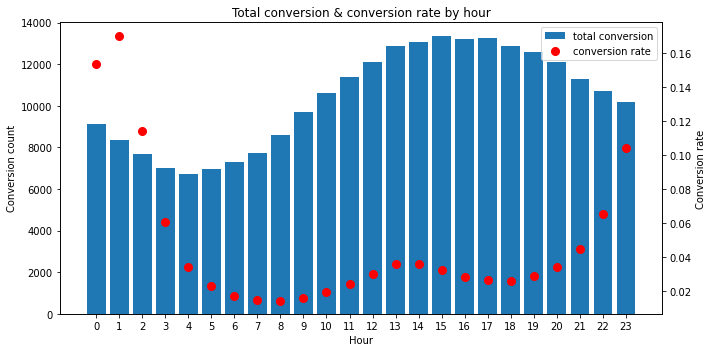

Conversion rate by hour:


,order_id
hour,
1,0.170240
0,0.153783
2,0.114046
23,0.104444
22,0.065256
3,0.060812
21,0.044937
13,0.036120
14,0.035840


In [19]:
# Hour has the highest conversion rate 
conversion_count_by_hour = product[product['target'] == 1].groupby('hour')['order_id'].count().sort_values(ascending=False) # Count total conversion for each hour
visit_count_by_hour = product[product['target'] == 0].groupby('hour')['order_id'].count().loc[conversion_count_by_hour.index] # Count total visit for each hour
conversion_rate_by_hour = conversion_count_by_hour/visit_count_by_hour # Calculate conversion rate

# Visualize total conversion and conversion rate of each hour
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(conversion_count_by_hour.index, conversion_count_by_hour.values, label='total conversion') # Plot total conversion
ax1.set_title('Total conversion & conversion rate by hour')
ax1.set_ylabel('Conversion count')
ax1.set_xlabel('Hour')

ax2 = ax1.twinx() # Plot conversion rate
ax2.plot(conversion_rate_by_hour.index, conversion_rate_by_hour.values, color='r', marker='o', markersize=8, linestyle="None", label='conversion rate') 
ax2.set_ylabel('Conversion rate')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.xticks(conversion_count_by_hour.index)
plt.tight_layout()
plt.show()

# Print conversion rate 
print("".center(50, "="))
print("Conversion rate by hour:")
conversion_rate_by_hour.sort_values(ascending=False).to_frame().style.background_gradient(cmap='Blues')

- Customers tend to purchase **more** during **midnight** and **afternoon**. This is because most people (especially white-collar workers) are free during these timeframe. 
- Hence, during 4a.m - 10a.m and 4p.m - 7p.m, customers tend to purchase **less** because they'll have to go to work and having dinner with family.

**Question:** Conversion rate trend by product?

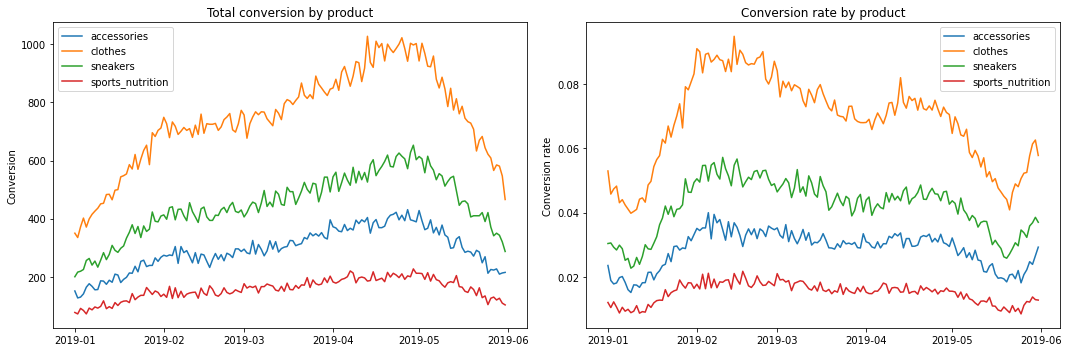

In [20]:
# Conversion rate overtime of each product 
conversion_by_product_overtime = pd.pivot_table(
    data=product[product['target'] == 1],
    index='date',
    columns='product',
    values='order_id',
    aggfunc='count'
) # conversion count by product overtime

visit_by_product_overtime = pd.pivot_table(
    data=product[product['target'] == 0],
    index='date',
    columns='product',
    values='order_id',
    aggfunc='count'
).drop(columns='company') # visit count by product overtime

conversion_rate_by_product_overtime = conversion_by_product_overtime/visit_by_product_overtime # conversion rate by product overtime 

# Plot conversion trend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(conversion_by_product_overtime) # Plot conversion count 
ax2.plot(conversion_rate_by_product_overtime) # Plot conversion rate

ax1.set_ylabel('Conversion')
ax2.set_ylabel('Conversion rate')

ax1.set_title('Total conversion by product')
ax2.set_title('Conversion rate by product')

ax1.legend(conversion_by_product_overtime.columns)
ax2.legend(conversion_rate_by_product_overtime.columns)

plt.tight_layout()
plt.show()

- Clothes have the highest conversion rate as well as total conversion overtime.
- Sport nutrition is the lowest. 
- All products tend to have an **up-trend at the first quarter**, then start to plateau and will **decline at the start of May**. However, it quickly **bounce back at the start of the third quarter**. This maybe because people will want to buy more new things for a new year. 

**Question:** Conversion rate trend by site version?

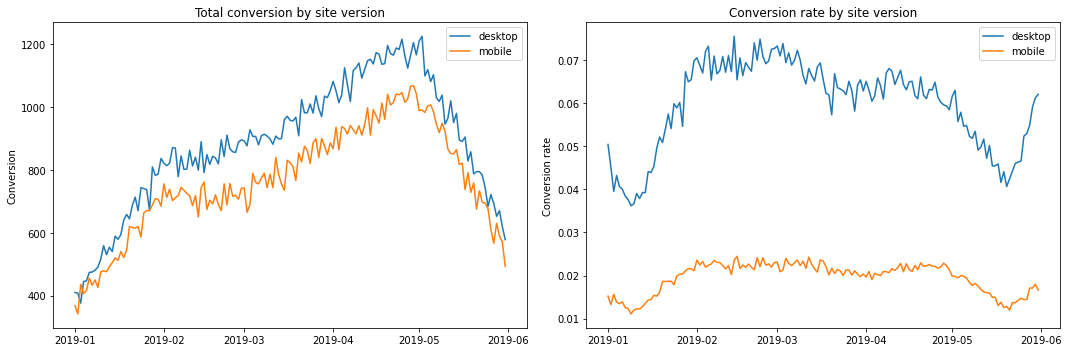

In [21]:
# Conversion rate overtime of each site version 
conversion_by_site_version_overtime = pd.pivot_table(
    data=product[product['target'] == 1],
    index='date',
    columns='site_version',
    values='order_id',
    aggfunc='count'
) # conversion count by site version overtime

visit_by_site_version_overtime = pd.pivot_table(
    data=product[product['target'] == 0],
    index='date',
    columns='site_version',
    values='order_id',
    aggfunc='count'
) # visit count by site version overtime

conversion_rate_by_site_version_overtime = conversion_by_site_version_overtime/visit_by_site_version_overtime # conversion rate by site version overtime 

# Plot conversion trend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(conversion_by_site_version_overtime) # Plot conversion count 
ax2.plot(conversion_rate_by_site_version_overtime) # Plot conversion rate

ax1.set_ylabel('Conversion')
ax2.set_ylabel('Conversion rate')

ax1.set_title('Total conversion by site version')
ax2.set_title('Conversion rate by site version')

ax1.legend(conversion_by_site_version_overtime.columns)
ax2.legend(conversion_rate_by_site_version_overtime.columns)

plt.tight_layout()
plt.show()

- Site version have exactly the same trend as that of product. 
- Desktop has much higher conversion rate than that of mobile 

-> **Interestingly**, people tend to use their mobile to access the web to get information, then go to the website to make a purchase -> **Mobile leads traffic, desktop delivers sales**  (Link: https://www.digitalcommerce360.com/2019/07/24/consumers-order-more-on-desktop-than-mobile-for-online-retailers/)

**Question:** Is there a difference in conversion rate trend in different month/day/hour between site versions?

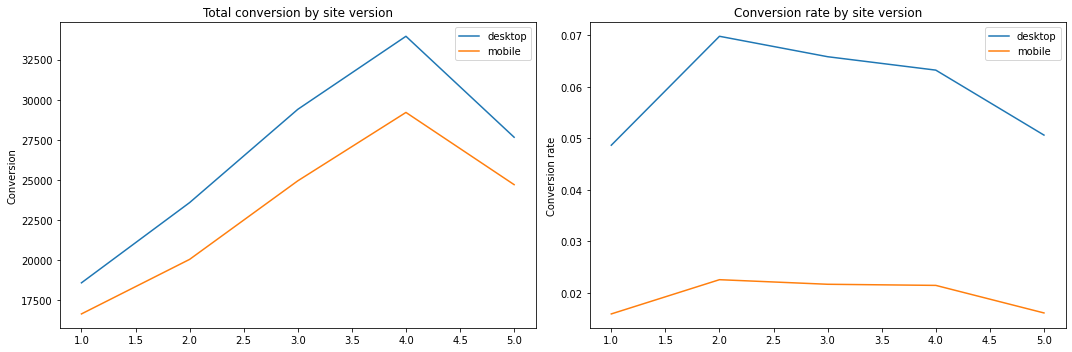

In [22]:
# Conversion rate each month of each site version 
conversion_by_site_version_each_month = pd.pivot_table(
    data=product[product['target'] == 1],
    index='month',
    columns='site_version',
    values='order_id',
    aggfunc='count'
) # conversion count by site version each month

visit_by_site_version_each_month = pd.pivot_table(
    data=product[product['target'] == 0],
    index='month',
    columns='site_version',
    values='order_id',
    aggfunc='count'
) # visit count by site version each month

conversion_rate_by_site_version_each_month = conversion_by_site_version_each_month/visit_by_site_version_each_month # conversion rate by site version each month 

# Plot conversion trend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(conversion_by_site_version_each_month) # Plot conversion count 
ax2.plot(conversion_rate_by_site_version_each_month) # Plot conversion rate

ax1.set_ylabel('Conversion')
ax2.set_ylabel('Conversion rate')

ax1.set_title('Total conversion by site version')
ax2.set_title('Conversion rate by site version')

ax1.legend(conversion_by_site_version_each_month.columns)
ax2.legend(conversion_rate_by_site_version_each_month.columns)

plt.tight_layout()
plt.show()

- Total conversion increase during January - April. 
- Conversion rate peaks at Febuary!

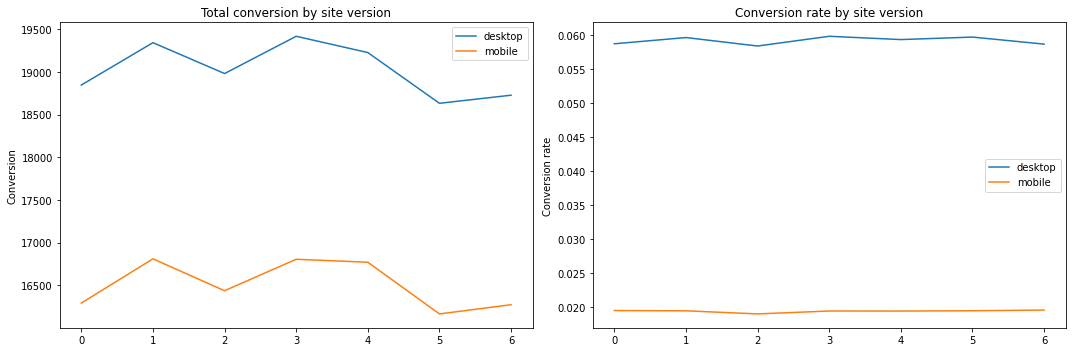

In [23]:
# Conversion rate each day of each site version 
conversion_by_site_version_each_day = pd.pivot_table(
    data=product[product['target'] == 1],
    index='day',
    columns='site_version',
    values='order_id',
    aggfunc='count'
) # conversion count by site version each day

visit_by_site_version_each_day = pd.pivot_table(
    data=product[product['target'] == 0],
    index='day',
    columns='site_version',
    values='order_id',
    aggfunc='count'
) # visit count by site version each day

conversion_rate_by_site_version_each_day = conversion_by_site_version_each_day/visit_by_site_version_each_day # conversion rate by site version each day 

# Plot conversion trend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(conversion_by_site_version_each_day) # Plot conversion count 
ax2.plot(conversion_rate_by_site_version_each_day) # Plot conversion rate

ax1.set_ylabel('Conversion')
ax2.set_ylabel('Conversion rate')

ax1.set_title('Total conversion by site version')
ax2.set_title('Conversion rate by site version')

ax1.legend(conversion_by_site_version_each_day.columns)
ax2.legend(conversion_rate_by_site_version_each_day.columns)

plt.tight_layout()
plt.show()

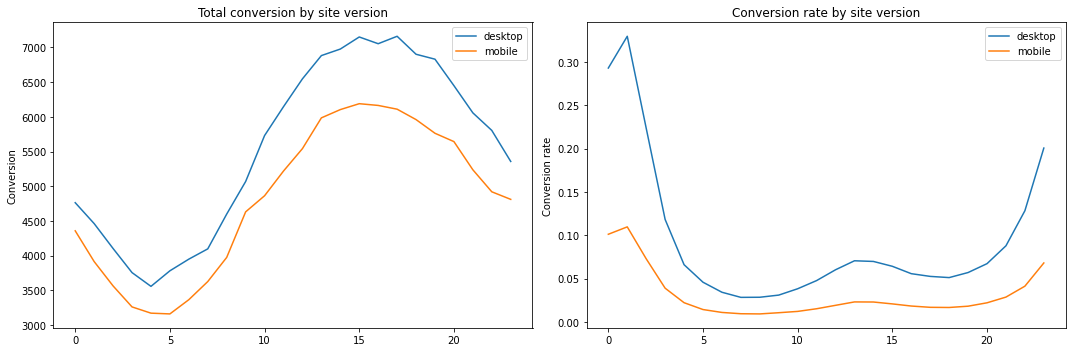

In [24]:
# Conversion rate each hour of each site version 
conversion_by_site_version_each_hour = pd.pivot_table(
    data=product[product['target'] == 1],
    index='hour',
    columns='site_version',
    values='order_id',
    aggfunc='count'
) # conversion count by site version each hour

visit_by_site_version_each_hour = pd.pivot_table(
    data=product[product['target'] == 0],
    index='hour',
    columns='site_version',
    values='order_id',
    aggfunc='count'
) # visit count by site version each hour

conversion_rate_by_site_version_each_hour = conversion_by_site_version_each_hour/visit_by_site_version_each_hour # conversion rate by site version each hour 

# Plot conversion trend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(conversion_by_site_version_each_hour) # Plot conversion count 
ax2.plot(conversion_rate_by_site_version_each_hour) # Plot conversion rate

ax1.set_ylabel('Conversion')
ax2.set_ylabel('Conversion rate')

ax1.set_title('Total conversion by site version')
ax2.set_title('Conversion rate by site version')

ax1.legend(conversion_by_site_version_each_hour.columns)
ax2.legend(conversion_rate_by_site_version_each_hour.columns)

plt.tight_layout()
plt.show()

- Conversion rate trend of both site versions is the same, it starts to increase significantly during midnight, then start to plateau during the day

**Question:** Is there a difference in conversion rate trend in different month/day/hour between products?

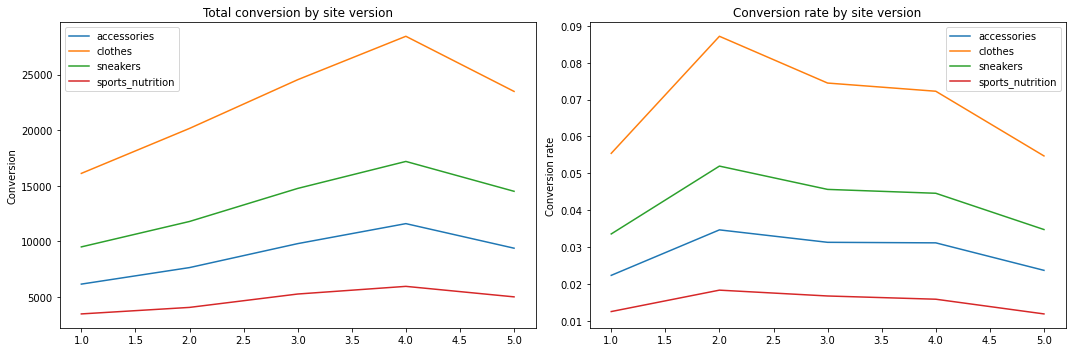

In [25]:
# Conversion rate each month of each product 
conversion_by_product_each_month = pd.pivot_table(
    data=product[product['target'] == 1],
    index='month',
    columns='product',
    values='order_id',
    aggfunc='count'
) # conversion count by product each month

visit_by_product_each_month = pd.pivot_table(
    data=product[product['target'] == 0],
    index='month',
    columns='product',
    values='order_id',
    aggfunc='count'
).drop(columns='company') # visit count by product each month

conversion_rate_by_product_each_month = conversion_by_product_each_month/visit_by_product_each_month # conversion rate by product each month 

# Plot conversion trend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(conversion_by_product_each_month) # Plot conversion count 
ax2.plot(conversion_rate_by_product_each_month) # Plot conversion rate

ax1.set_ylabel('Conversion')
ax2.set_ylabel('Conversion rate')

ax1.set_title('Total conversion by site version')
ax2.set_title('Conversion rate by site version')

ax1.legend(conversion_by_product_each_month.columns)
ax2.legend(conversion_rate_by_product_each_month.columns)

plt.tight_layout()
plt.show()

- Products have the same conversion rate monthly trend

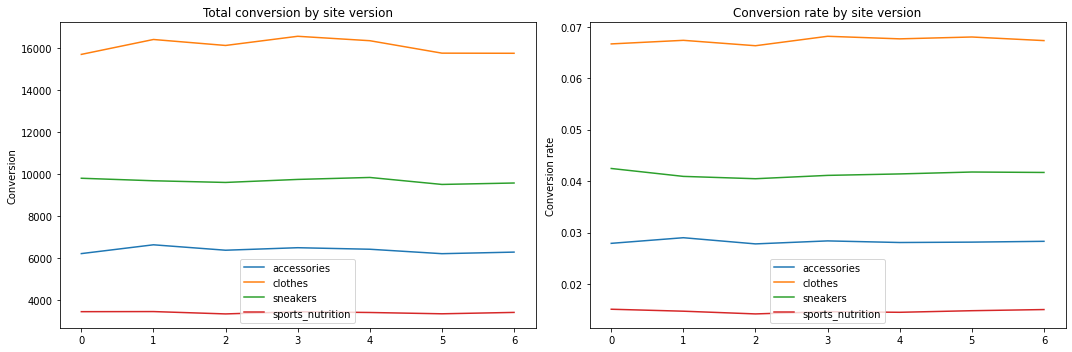

In [26]:
# Conversion rate each day of each product 
conversion_by_product_each_day = pd.pivot_table(
    data=product[product['target'] == 1],
    index='day',
    columns='product',
    values='order_id',
    aggfunc='count'
) # conversion count by product each day

visit_by_product_each_day = pd.pivot_table(
    data=product[product['target'] == 0],
    index='day',
    columns='product',
    values='order_id',
    aggfunc='count'
).drop(columns='company') # visit count by product each day

conversion_rate_by_product_each_day = conversion_by_product_each_day/visit_by_product_each_day # conversion rate by product each day 

# Plot conversion trend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(conversion_by_product_each_day) # Plot conversion count 
ax2.plot(conversion_rate_by_product_each_day) # Plot conversion rate

ax1.set_ylabel('Conversion')
ax2.set_ylabel('Conversion rate')

ax1.set_title('Total conversion by site version')
ax2.set_title('Conversion rate by site version')

ax1.legend(conversion_by_product_each_day.columns)
ax2.legend(conversion_rate_by_product_each_day.columns)

plt.tight_layout()
plt.show()

- Products have the same conversion rate day trend

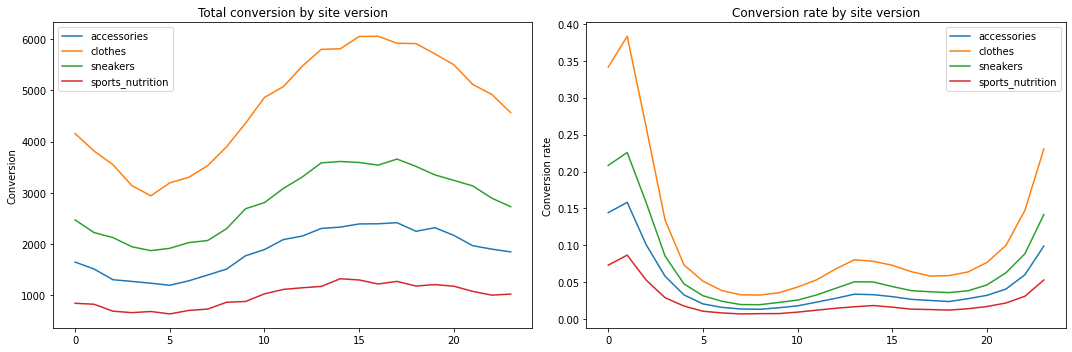

In [27]:
# Conversion rate each hour of each product 
conversion_by_product_each_hour = pd.pivot_table(
    data=product[product['target'] == 1],
    index='hour',
    columns='product',
    values='order_id',
    aggfunc='count'
) # conversion count by product each hour

visit_by_product_each_hour = pd.pivot_table(
    data=product[product['target'] == 0],
    index='hour',
    columns='product',
    values='order_id',
    aggfunc='count'
).drop(columns='company') # visit count by product each hour

conversion_rate_by_product_each_hour = conversion_by_product_each_hour/visit_by_product_each_hour # conversion rate by product each hour 

# Plot conversion trend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(conversion_by_product_each_hour) # Plot conversion count 
ax2.plot(conversion_rate_by_product_each_hour) # Plot conversion rate

ax1.set_ylabel('Conversion')
ax2.set_ylabel('Conversion rate')

ax1.set_title('Total conversion by site version')
ax2.set_title('Conversion rate by site version')

ax1.legend(conversion_by_product_each_hour.columns)
ax2.legend(conversion_rate_by_product_each_hour.columns)

plt.tight_layout()
plt.show()

- Products have the same conversion rate hour trend

**Question:** Conversion rate trend of each product in different site version 

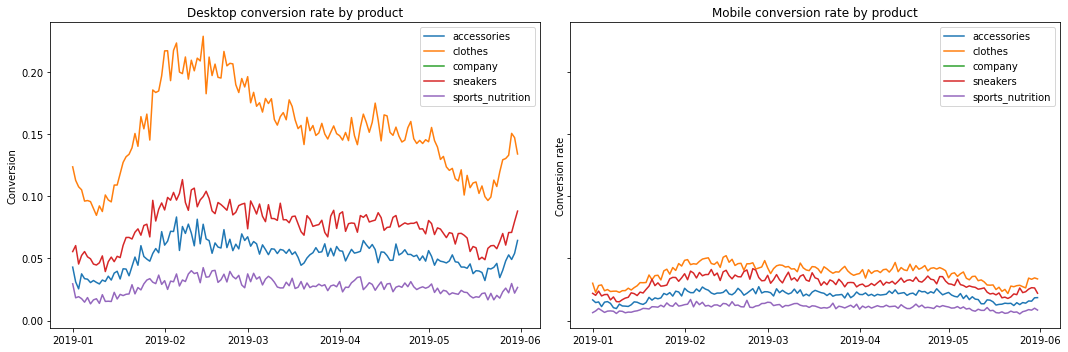

In [28]:
# Conversion rate overtime of each product 
conversion_by_product_siteversion_overtime = pd.pivot_table(
    data=product[product['target'] == 1],
    index='date',
    columns=['site_version','product'],
    values='order_id',
    aggfunc='count'
) # conversion count by product overtime

visit_by_product_siteversion_overtime = pd.pivot_table(
    data=product[product['target'] == 0],
    index='date',
    columns=['site_version','product'],
    values='order_id',
    aggfunc='count'
) # visit count by product overtime

conversion_rate_by_product_siteversion_overtime = conversion_by_product_siteversion_overtime/visit_by_product_siteversion_overtime # conversion rate by product overtime 
desktop_conversion_rate_by_product_overtime = conversion_rate_by_product_siteversion_overtime['desktop']
mobile_conversion_rate_by_product_overtime = conversion_rate_by_product_siteversion_overtime['mobile']

# Plot conversion trend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1.plot(desktop_conversion_rate_by_product_overtime) # Plot conversion count 
ax2.plot(mobile_conversion_rate_by_product_overtime) # Plot conversion rate

ax1.set_ylabel('Conversion')
ax2.set_ylabel('Conversion rate')

ax1.set_title('Desktop conversion rate by product')
ax2.set_title('Mobile conversion rate by product')

ax1.legend(desktop_conversion_rate_by_product_overtime.columns)
ax2.legend(mobile_conversion_rate_by_product_overtime.columns)

plt.tight_layout()
plt.show()

- Conversion rate trend of each product on desktop and mobile are the same. 
- However, **conversion rate trend of clothes on desktop is much higher** than the rest on either its of desktop or mobile.

#### Hypothesis Tesing

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [30]:
def anova_test_one_way(dataframe, feature, a=0.05):
  """
  This function will do (1) ANOVA one-way hypothesis test; (2) post-hoc pairwise tukeyhsd; 
  (3) visualize a boxplot & a kde plot.
  Note: dataframe must be grouped by ONE feature only!!!
  """

  # Melting dataframe data
  dataframe_melt = pd.melt(dataframe.reset_index(drop=True))

  # ANOVA analysis: Fit and summarize ols model 
  model = ols('value ~ C({})'.format(feature), data=dataframe_melt).fit()
  anova_table_type_1 = sm.stats.anova_lm(model, typ=1)

  # Show ANOVA analysis results
  print("ANOVA table:")
  print(anova_table_type_1)

  # Post-hoc analysis: Pairwise tukeyhsd
  a = 0.05
  tukey = pairwise_tukeyhsd(endog=dataframe_melt['value'],
                            groups=dataframe_melt[feature],
                            alpha=a)
  print("\n\nPost-hoc pairwise tukeyhsd analysis:")
  print(tukey)

  # Visualizing 
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
  sns.boxplot(data=dataframe_melt, y='value', x=feature, palette='flare', ax=ax1)
  sns.histplot(dataframe_melt, x='value', hue=feature, kde=True, stat='density', alpha=0.3, element="step", palette='flare',ax=ax2)
  plt.show()  

**Question:** Is there a significant difference in conversion rate between each site version?

ANOVA table:
                    df    sum_sq   mean_sq            F         PR(>F)
C(site_version)    1.0  0.121280  0.121280  2066.451019  1.398960e-136
Residual         300.0  0.017607  0.000059          NaN            NaN


Post-hoc pairwise tukeyhsd analysis:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
desktop mobile  -0.0401 0.001 -0.0418 -0.0383   True
----------------------------------------------------


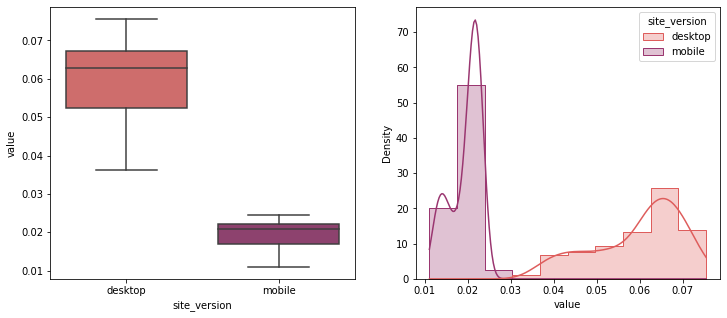

In [31]:
# H0: There's no difference in conversion rate between each site version 
# H1: There's a difference in conversion rate between each site version 
anova_test_one_way(conversion_rate_by_site_version_overtime, 'site_version')

- P-value < 0.05 => There's a significant difference in coversion rate between desktop and mobile => desktop has much higher conversion rate!

**Question:** Is there a significant difference in conversion rate between each product?

ANOVA table:
               df    sum_sq   mean_sq            F         PR(>F)
C(product)    3.0  0.237755  0.079252  1004.674963  1.996700e-233
Residual    600.0  0.047330  0.000079          NaN            NaN


Post-hoc pairwise tukeyhsd analysis:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2      meandiff p-adj  lower   upper  reject
------------------------------------------------------------------
accessories          clothes   0.0401 0.001  0.0375  0.0428   True
accessories         sneakers   0.0135 0.001  0.0109  0.0161   True
accessories sports_nutrition  -0.0135 0.001 -0.0162 -0.0109   True
    clothes         sneakers  -0.0267 0.001 -0.0293  -0.024   True
    clothes sports_nutrition  -0.0537 0.001 -0.0563  -0.051   True
   sneakers sports_nutrition   -0.027 0.001 -0.0297 -0.0244   True
------------------------------------------------------------------


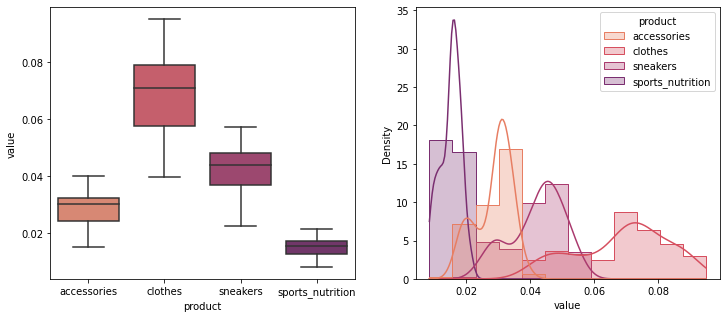

In [32]:
# H0: There's no difference in conversion rate between each product 
# H1: There's a difference in conversion rate between each product
anova_test_one_way(conversion_rate_by_product_overtime, 'product')

- P-value < 0.05 => There's a significant difference in coversion rate between each products => clothes is the highest, sneakers is the second, then accessories and sport nutrition

# **4. Conclusion & Recommendation**

**Overview of the data:** 
- Each product accounts for 19% - 20% of total data.
- More than 71% users prefer using mobile phone than desktop (only 28%)
- Nearly 3% of users have purchased, the click rate is about 10%.

**Recommendation:** 
- Put more advertising banners on the first quarter, especially on Febuary because users tend to buy more products at the start of a new year.
- Focus on pushing **clothes and sneakers** advertising banners in **2 timeframes: 8p.m - 3a.m and 11p.m - 3.am** on both **website and mobile** to increase conversion rate. 
- We have to put advertising banners on both website and mobile is because users will check information using mobile device, then go to the website to buy. Therefore, we have to constantly remind customers about the products across platforms to turn leads into sales.